# KUIS 1 PEMBELAJARAN MESIN
Klasifikasi SVM Pada Data Citra
# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Kelompok 6
Anggota:
- Ahmed Fathir Syafaat (2241720083)
- Mochammad Cholilur R. (2241720033)
- Tyase Nisa’an Jamilaa (2241720012)
- Yuma Rakha Samodra S. (2241720194)


---

# Preparation

In [ ]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


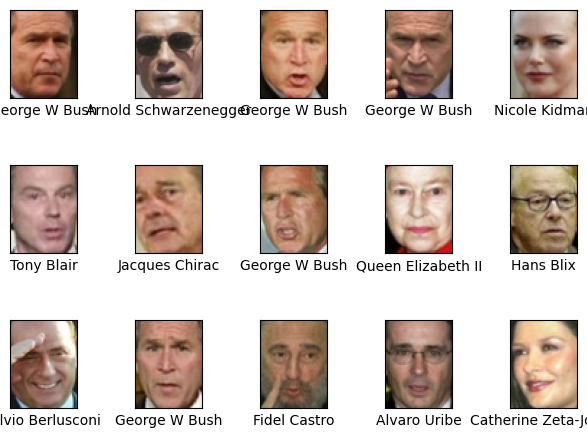

In [ ]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

'\n    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,\n\n    1. Standardisasi nilai fitur ataupun label\n    2. Penyesuaian ukuran gambar\n    3. Perubahan colorspace gambar\n    4. dsb\n'

New data dimension: (4324, 50, 50, 3)


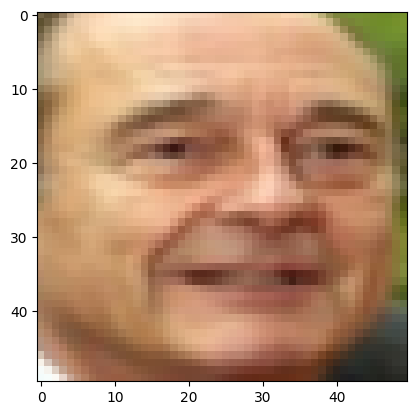

In [ ]:
from skimage.transform import resize

# Resize images to a smaller size for faster processing
# Resize images to 50x50 pixels
resized_images = np.array([resize(image, (50, 50, 3)) for image in faces.images])

# Check the new shape of the resized images
print(f'New data dimension: {resized_images.shape}')

plt.imshow(resized_images[0])

# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

'\n    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.\n    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.\n\n    Hints:\n        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,\n        Anda dapat menggunakan fungsi np.histrogram dari library numpy\n'

In [ ]:
# Extract histogram features for each channel
def extract_histogram_features(images, bins=512):
    hist_features = []
    for img in images:
        hist_r, _ = np.histogram(img[:, :, 0], bins=bins//3, range=(0, 1))
        hist_g, _ = np.histogram(img[:, :, 1], bins=bins//3, range=(0, 1))
        hist_b, _ = np.histogram(img[:, :, 2], bins=bins//3, range=(0, 1))
        hist_features.append(np.concatenate([hist_r, hist_g, hist_b]))
    return np.array(hist_features)

# Extract histogram features from resized images
hist_features = extract_histogram_features(resized_images)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hist_features, faces.target, test_size=0.3, random_state=42)

# Normalize histogram features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

'\n    Pada bagian ini lakukan proses pembuatan model,\n\n    1. Pembuatan data training dan data testing\n    2. Pembuatan objek model\n    3. Proses fitting model\n'

In [ ]:
# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model dengan data training
svm_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = svm_model.predict(X_test)

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

'\n    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing\n    dengan menggunakan metric akurasi dan juga classfication report\n\n    Hints:\n        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5\n'

In [ ]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f"Accuracy: {accuracy*100:.2f}%\n")

# Generate a classification report
print(classification_report(y_test, y_pred, target_names=faces.target_names))

Accuracy: 0.49229583975346686
Accuracy: 49.23%

                           precision    recall  f1-score   support

             Abdullah Gul       0.57      0.67      0.62         6
             Adrien Brody       0.17      0.50      0.25         2
         Alejandro Toledo       0.15      0.29      0.20         7
             Alvaro Uribe       0.55      0.55      0.55        11
          Amelie Mauresmo       0.60      0.43      0.50         7
             Andre Agassi       0.20      0.50      0.29         4
             Andy Roddick       0.33      0.40      0.36         5
           Angelina Jolie       0.25      0.33      0.29         3
              Ann Veneman       1.00      0.33      0.50         3
          Anna Kournikova       0.00      0.00      0.00         3
            Ari Fleischer       0.00      0.00      0.00         5
             Ariel Sharon       0.50      0.60      0.55        20
    Arnold Schwarzenegger       0.36      0.38      0.37        21
     Atal Bih

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


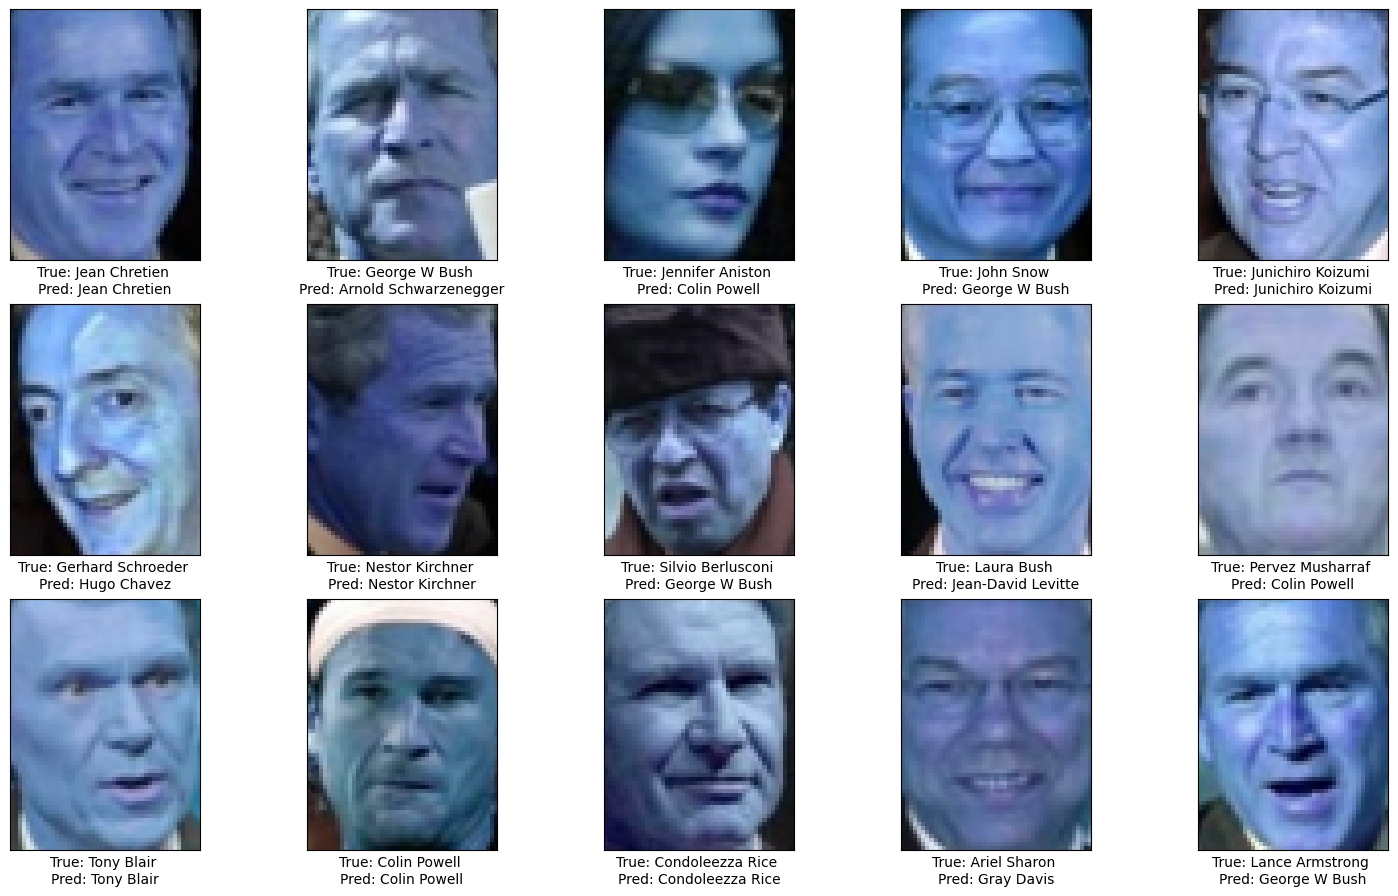

In [ ]:
import cv2 as cv
num_images = 15
random_indices = np.random.choice(len(X_test), num_images, replace=False)

fig, ax = plt.subplots(3, 5, figsize=(15, 9))
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(cv.cvtColor(faces.images[random_indices[i]], cv.COLOR_BGR2RGB))
    axi.set(xticks=[], yticks=[], xlabel=f"True: {faces.target_names[y_test[random_indices[i]]]} \nPred: {faces.target_names[y_pred[random_indices[i]]]}")

plt.show()

Menggunakan fitur lain selain histogram

In [ ]:
from sklearn.decomposition import PCA

# Function to extract PCA features
def extract_pca_features(images, n_components=100):
    # Flatten the images for PCA
    flattened_images = images.reshape(images.shape[0], -1)

    # Initialize PCA
    pca = PCA(n_components=n_components, random_state=42)

    # Fit PCA on the flattened images
    pca_features = pca.fit_transform(flattened_images)

    return pca_features, pca

# Extract PCA features from resized images
pca_features, pca_model = extract_pca_features(resized_images)

# Check the shape of the PCA features
print(f'PCA features shape: {pca_features.shape}')

PCA features shape: (4324, 100)


Menggunakan model lain selain SVM

In [ ]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, faces.target, test_size=0.3, random_state=42)

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Evalusi dengan metric lain ataupun report dengan confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Memprediksi label untuk data uji
y_pred = logreg_model.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menghitung dan mencetak akurasi
test_accuracy = accuracy_score(y_test, y_pred)
print(f'\nTesting Accuracy: {test_accuracy}')
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

Confusion Matrix:
[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 1]]

Testing Accuracy: 0.4676425269645609
Testing Accuracy: 46.76%


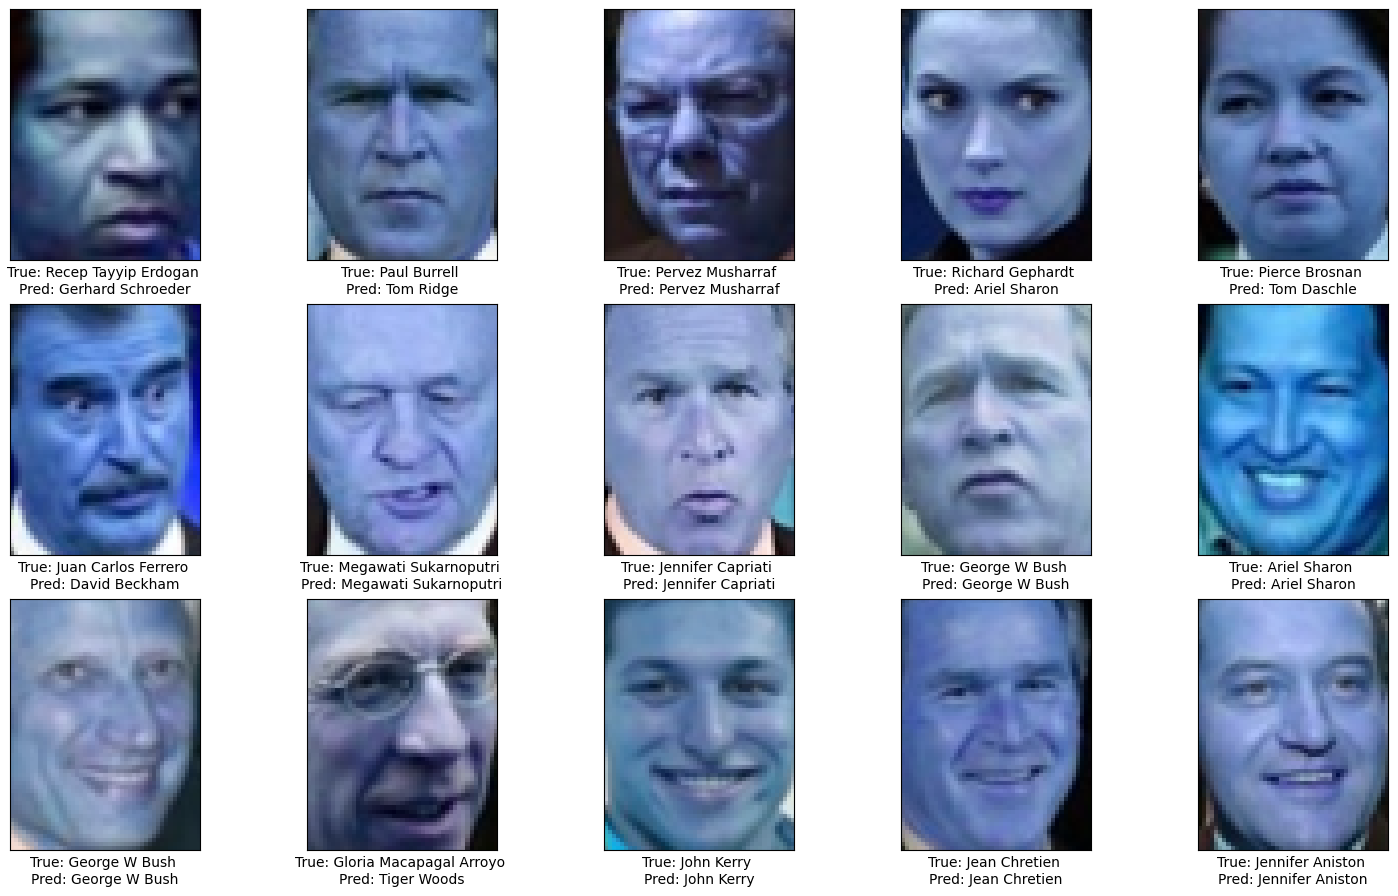

In [ ]:
import cv2 as cv
num_images = 15
random_indices = np.random.choice(len(X_test), num_images, replace=False)

fig, ax = plt.subplots(3, 5, figsize=(15, 9))
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(cv.cvtColor(faces.images[random_indices[i]], cv.COLOR_BGR2RGB))
    axi.set(xticks=[], yticks=[], xlabel=f"True: {faces.target_names[y_test[random_indices[i]]]} \nPred: {faces.target_names[y_pred[random_indices[i]]]}")

plt.show()